In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
companies=pd.read_csv('2021_registered_companies.csv')

### Number of Companies Registered in each month.

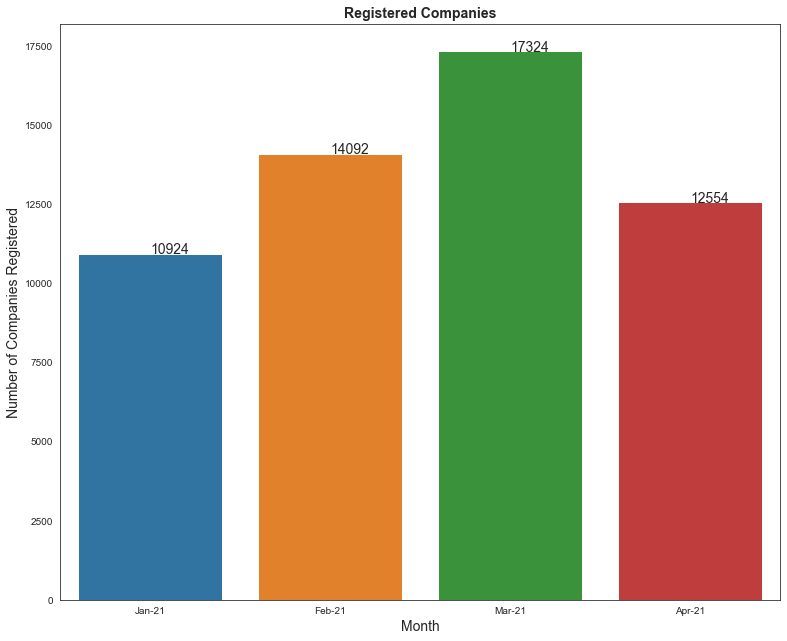

In [14]:
ax=plt.figure(figsize=(10,8)).add_axes([0,0,1,1])
sns.set_style('white')
sns.countplot(x='month_name',data=companies)

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%i"% rect.get_height()
             ,fontsize=14 )

plt.title('Registered Companies',fontsize=14, weight='bold')
plt.xlabel('Month',fontsize=14)
plt.ylabel('Number of Companies Registered',fontsize=14)
plt.show()

### Companies Registered by Date

In [15]:
companies_date=pd.DataFrame(companies['date_of_registration'].groupby
                              (companies['date_of_registration'].iloc[:]).count())
companies_date.rename(columns={"date_of_registration":"count"},inplace=True)
companies_date.sort_values('date_of_registration')
companies_date.reset_index(inplace=True)
month_date=pd.DataFrame(companies['date_of_registration'].value_counts())
month_date.reset_index(inplace=True)
month_date['month']='month'
month_date.sort_values('index',inplace=True)

def assign_month(df):
    for i in range(0,len(df.index)):
        if '/01' in df.loc[i,'index']:
            df.loc[i,'month']='Jan-21'
        elif '/02' in df.loc[i,'index']:
            df.loc[i,'month']='Feb-21'
        elif '/03' in df.loc[i,'index']:
            df.loc[i,'month']='Mar-21'
        elif '/04' in df.loc[i,'index']:
            df.loc[i,'month']='Apr-21'
            
assign_month(month_date)

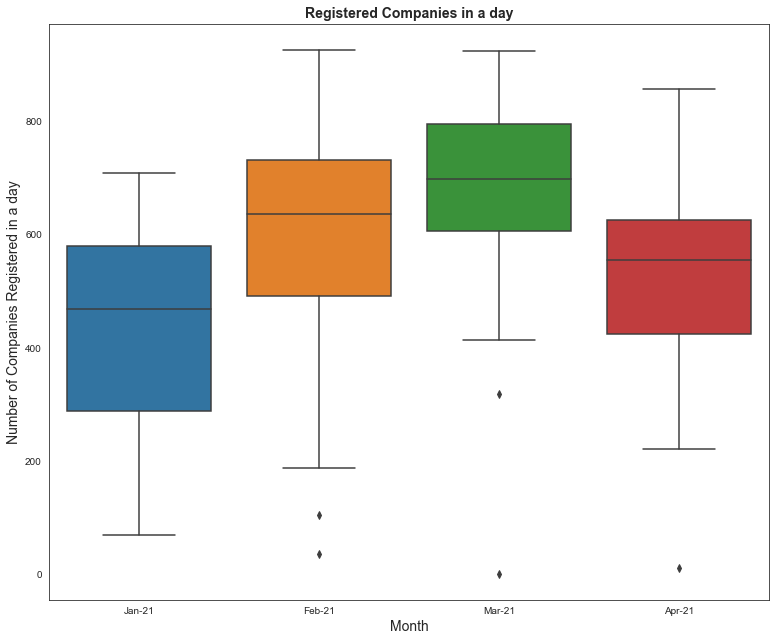

In [16]:
ax=plt.figure(figsize=(10,8)).add_axes([0,0,1,1])
sns.set_style('white')
sns.boxplot(x='month',y='date_of_registration',data=month_date)
plt.title('Registered Companies in a day',fontsize=14, weight='bold')
plt.xlabel('Month',fontsize=14)
plt.ylabel('Number of Companies Registered in a day',fontsize=14)
plt.show()

### Companies in each Sector


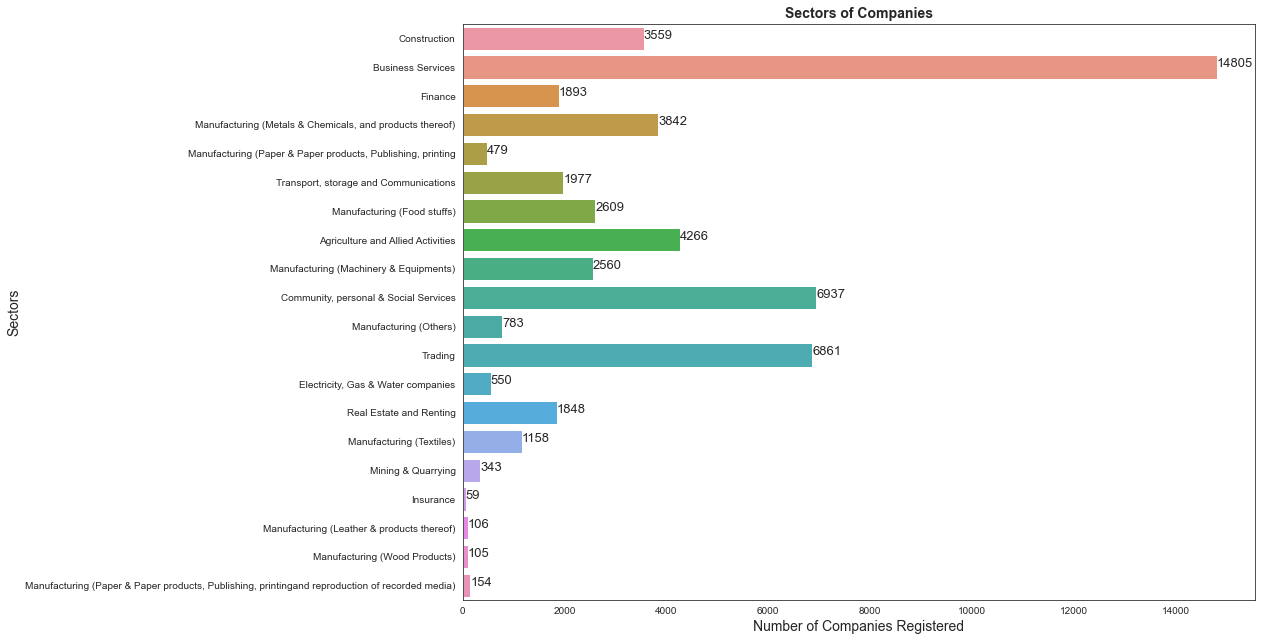

In [17]:
ax=plt.figure(figsize=(11,8)).add_axes([0,0,1,1])
sns.set_style('white')
sns.countplot(y='activity_description',data=companies)
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,
             "%i"% rect.get_width(),fontsize=13 )

plt.title('Sectors of Companies',fontsize=14, weight='bold')
plt.xlabel('Number of Companies Registered',fontsize=14)
plt.ylabel('Sectors',fontsize=14)
plt.show()

In [18]:
companies_sector=pd.DataFrame(companies['activity_description'].groupby
                              (companies['activity_description'].iloc[:]).count())
companies_sector.rename(columns={"activity_description":"count"},inplace=True)
companies_sector.sort_values('count',ascending=False,inplace=True)
companies_sector.loc['Others'] = [ companies_sector.iloc[5:,0].sum()] 
companies_sector.sort_values('count',ascending=False,inplace=True)
companies_sector=companies_sector.iloc[:6,0]

<Figure size 6000x4000 with 0 Axes>

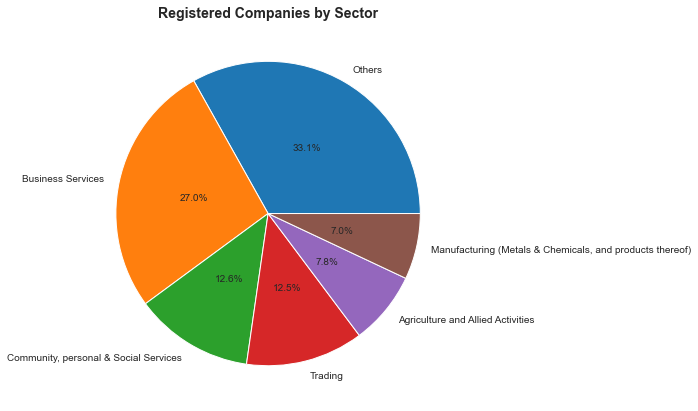

In [19]:
plt.figure(dpi=1000)

pie, ax = plt.subplots(figsize=[10,7])
labels = companies_sector.keys()
plt.pie(x=companies_sector, autopct="%.1f%%",labels=labels, pctdistance=0.5)
plt.title("Registered Companies by Sector", weight='bold',fontsize=14);
plt.show()

### Comparision of Companies on the basis of Authorized and Paid-up capital

In [20]:
companies_activity=companies.pivot_table(index='activity_description',values=['paidup_capital','authorized_capital'])
companies_activity.reset_index(inplace=True)

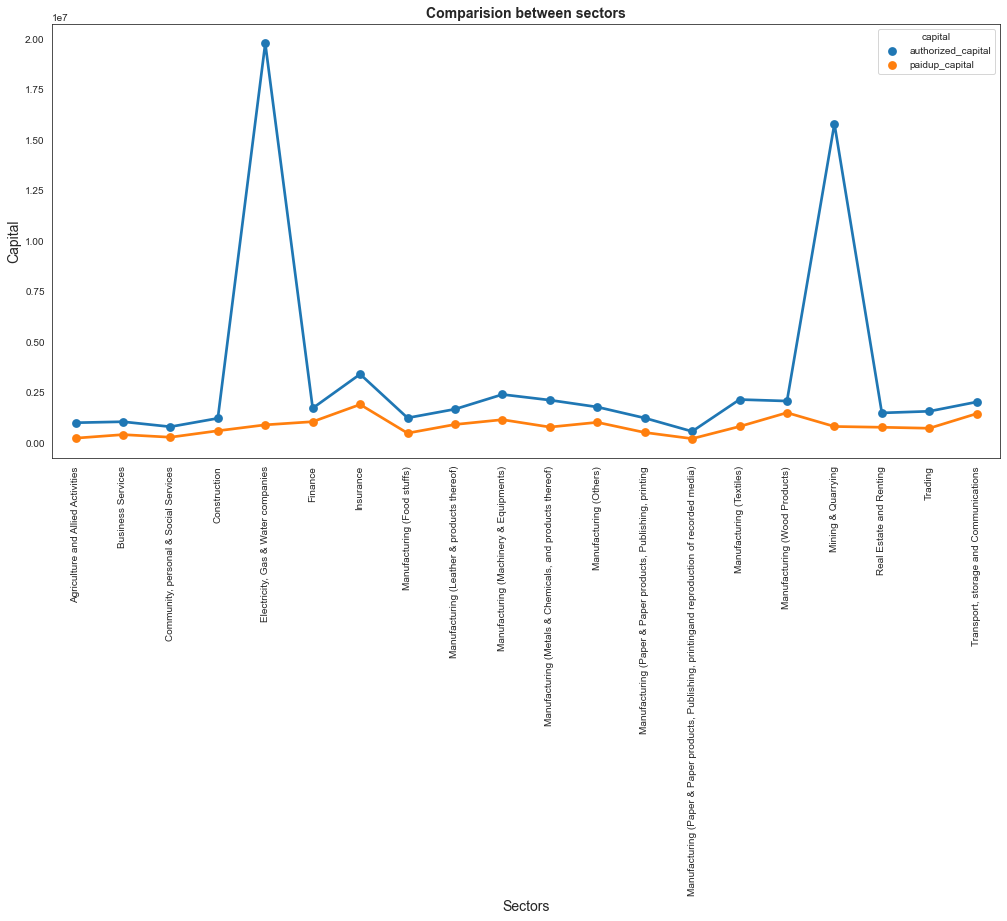

In [21]:
plt.figure(figsize=(17,8))
df = companies_activity.melt('activity_description', var_name='capital',  value_name='vals')
sns.pointplot(x="activity_description", y="vals", hue='capital', data=df)
plt.xticks(rotation = 90)
plt.title('Comparision between sectors',fontsize=14, weight='bold')
plt.xlabel('Sectors',fontsize=14)
plt.ylabel('Capital',fontsize=14)
plt.show()

### Companies registered in states

In [22]:
companies_state=pd.DataFrame(companies['state'].groupby
                              (companies['state'].iloc[:]).count())
companies_state.rename(columns={"state":"count"},inplace=True)
companies_state.sort_values('count',ascending=False,inplace=True)
companies_state.reset_index(inplace=True)

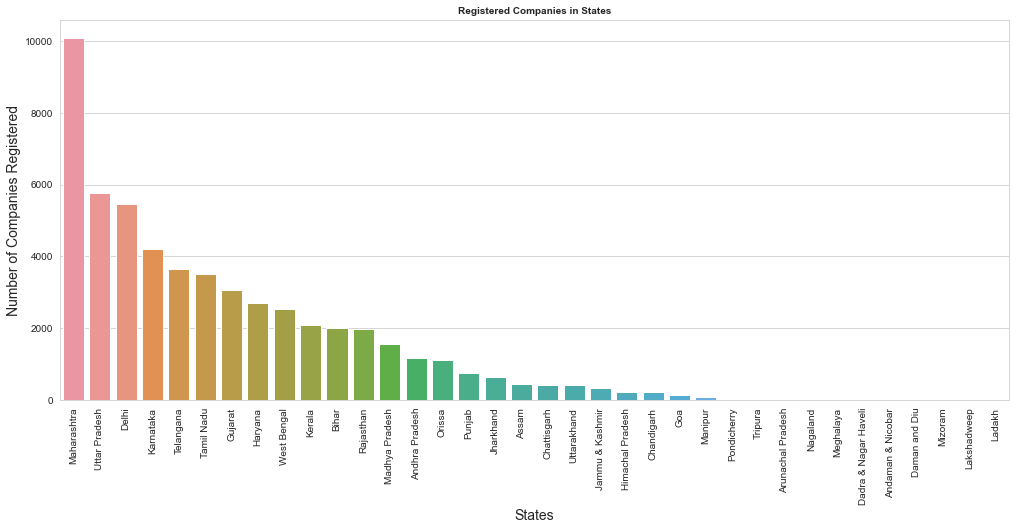

In [23]:
plt.figure(figsize=(17,7))
sns.set_style('whitegrid')
sns.barplot(x='state',y='count',data=companies_state)

plt.xticks(rotation = 90)
plt.title('Registered Companies in States',fontsize=10, weight='bold')
plt.xlabel('States',fontsize=14)
plt.ylabel('Number of Companies Registered',fontsize=14)
plt.show()

#### The graph of some of the graphs at last are not visibile so they are seperately plotted here

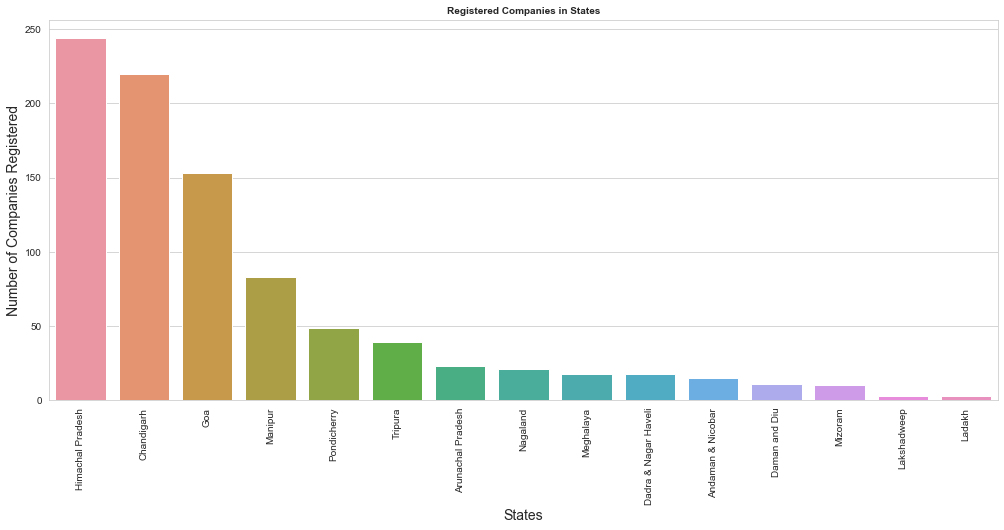

In [24]:
plt.figure(figsize=(17,7))
sns.set_style('whitegrid')
sns.barplot(x='state',y='count',data=companies_state[21:])

plt.xticks(rotation = 90)
plt.title('Registered Companies in States',fontsize=10, weight='bold')
plt.xlabel('States',fontsize=14)
plt.ylabel('Number of Companies Registered',fontsize=14)
plt.show()

### Comparision of trends in top 5 states with national trends

In [25]:
companies5=companies[(companies['state'] == 'Maharashtra') |
                     (companies['state'] == 'Uttar Pradesh') |
                     (companies['state'] == 'Delhi') |
                     (companies['state'] == 'Karnataka') |
                     (companies['state'] == 'Telangana')
                    ]

In [26]:
companies5_sector=pd.DataFrame(companies5['activity_description'].groupby
                              (companies5['activity_description'].iloc[:]).count())
companies5_sector.rename(columns={"activity_description":"count"},inplace=True)
companies5_sector.sort_values('count',ascending=False,inplace=True)
companies5_sector.loc['Others'] = [ companies5_sector.iloc[5:,0].sum()] 
companies5_sector.sort_values('count',ascending=False,inplace=True)
companies5_sector=companies5_sector.iloc[:6,0]

<Figure size 6000x4000 with 0 Axes>

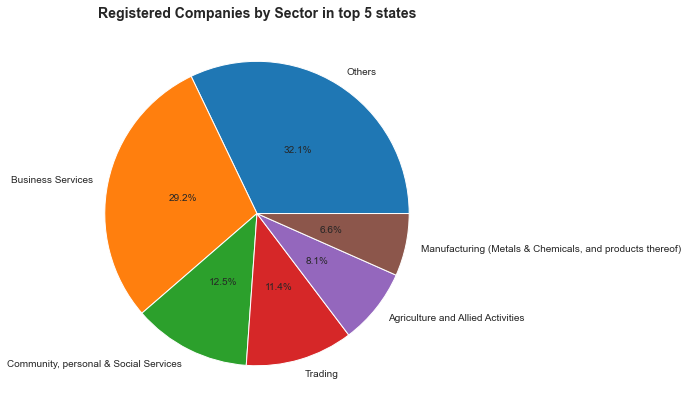

In [27]:
plt.figure(dpi=1000)

pie, ax = plt.subplots(figsize=[10,7])
labels = companies5_sector.keys()
plt.pie(x=companies5_sector, autopct="%.1f%%",labels=labels, pctdistance=0.5)
plt.title("Registered Companies by Sector in top 5 states", weight='bold',fontsize=14);
plt.show()

In [28]:
companies5_activity=companies5.pivot_table(index='activity_description',values=['paidup_capital','authorized_capital'])
companies5_activity.reset_index(inplace=True)

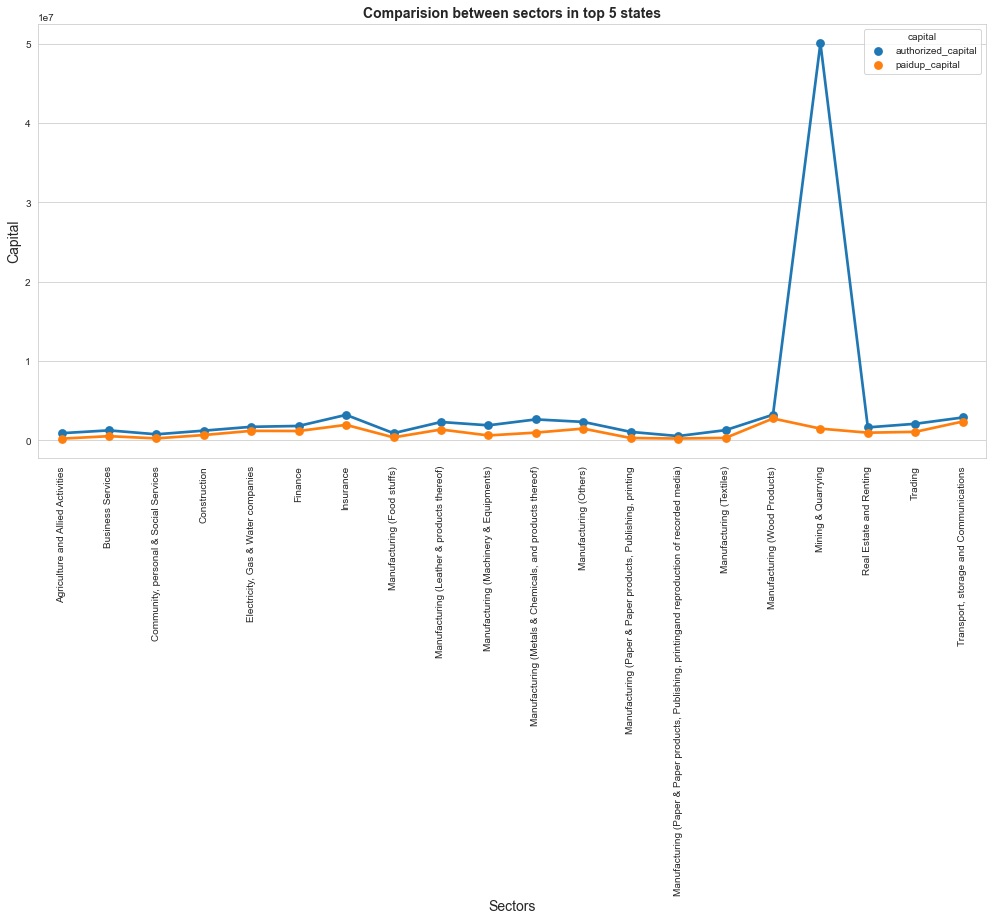

In [29]:
plt.figure(figsize=(17,8))
df = companies5_activity.melt('activity_description', var_name='capital',  value_name='vals')
sns.pointplot(x="activity_description", y="vals", hue='capital', data=df)
plt.xticks(rotation = 90)
plt.title('Comparision between sectors in top 5 states',fontsize=14, weight='bold')
plt.xlabel('Sectors',fontsize=14)
plt.ylabel('Capital',fontsize=14)
plt.show()

### Companies registered in various RoC

In [30]:
companies_roc=pd.DataFrame(companies['roc'].groupby
                              (companies['roc'].iloc[:]).count())
companies_roc.rename(columns={"roc":"count"},inplace=True)
companies_roc.sort_values('count',ascending=False,inplace=True)
companies_roc.reset_index(inplace=True)


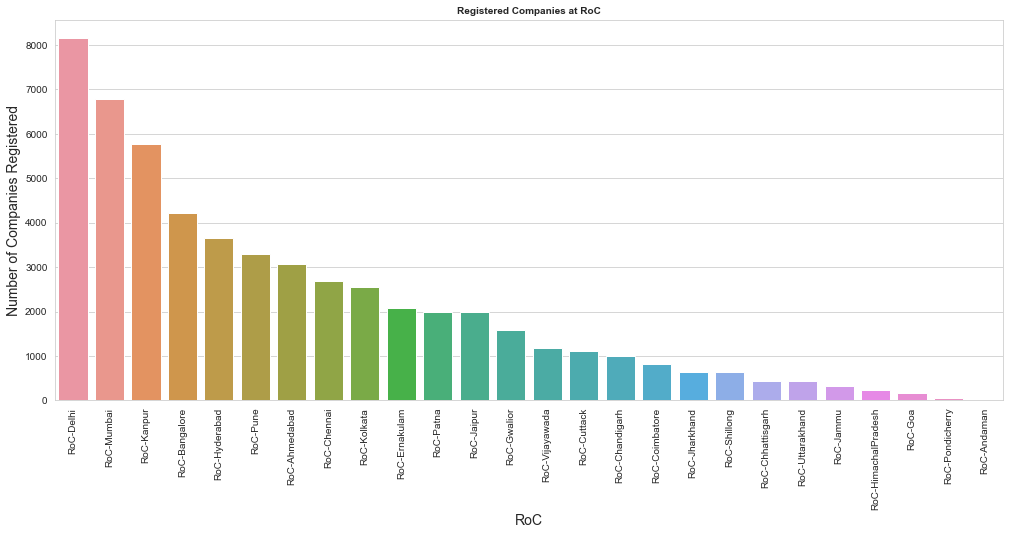

In [31]:
plt.figure(figsize=(17,7))
sns.set_style('whitegrid')

sns.barplot(x='roc',y='count',data=companies_roc)

plt.xticks(rotation = 90)
plt.title('Registered Companies at RoC',fontsize=10, weight='bold')
plt.xlabel('RoC',fontsize=14)
plt.ylabel('Number of Companies Registered',fontsize=14)
plt.show()

### Foreign Investments in India

In [32]:
companies_foreign=companies[companies['company_type']=='Subsidiary of Foreign Company']


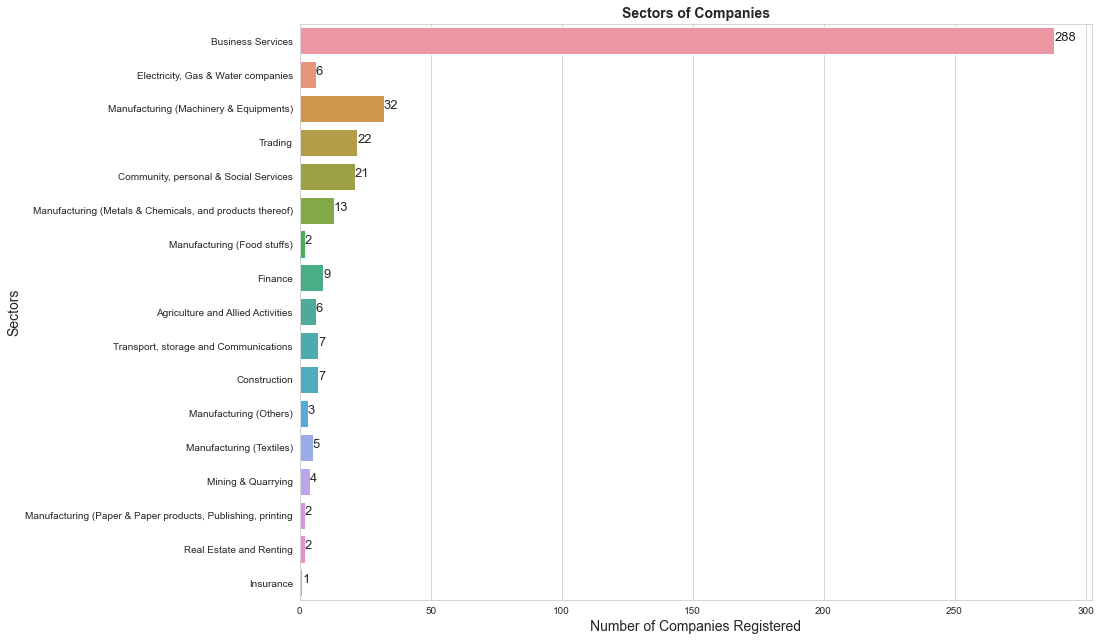

In [33]:
ax=plt.figure(figsize=(11,8)).add_axes([0,0,1,1])
sns.set_style('white')
sns.countplot(y='activity_description',data=companies_foreign)
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,
             "%i"% rect.get_width(),fontsize=13 )

plt.title('Sectors of Companies',fontsize=14, weight='bold')
plt.xlabel('Number of Companies Registered',fontsize=14)
plt.ylabel('Sectors',fontsize=14)
plt.show()

### Capital Raised by Foreign Countries in India

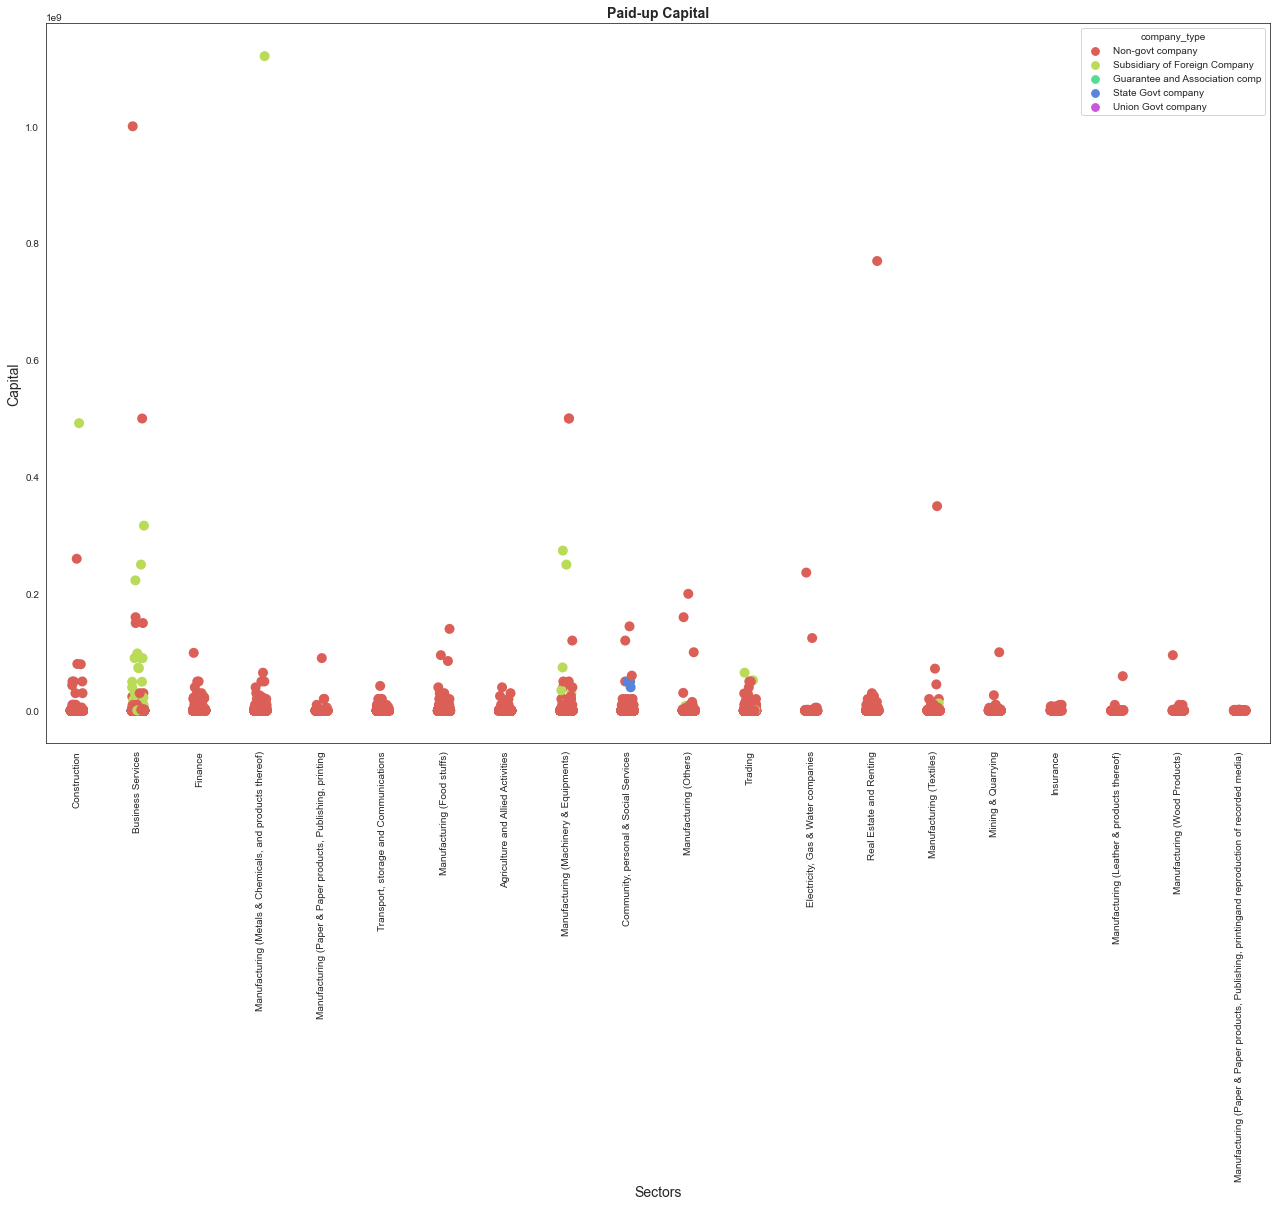

In [34]:
ax=plt.figure(figsize=(17,10)).add_axes([0,0,1,1])
sns.set_style('whitegrid')
sns.stripplot(x='activity_description',y='paidup_capital',data=companies[companies['paidup_capital']<1.5e9],
              jitter=True,hue='company_type',palette='hls',size=10)
plt.xticks(rotation = 90)
plt.title('Paid-up Capital',fontsize=14, weight='bold')
plt.xlabel('Sectors',fontsize=14)
plt.ylabel('Capital',fontsize=14)
plt.show()

In [35]:
fcompanies_activity=companies_foreign.pivot_table(index='activity_description',
                                                  values=['paidup_capital','authorized_capital'])
fcompanies_activity.reset_index(inplace=True)

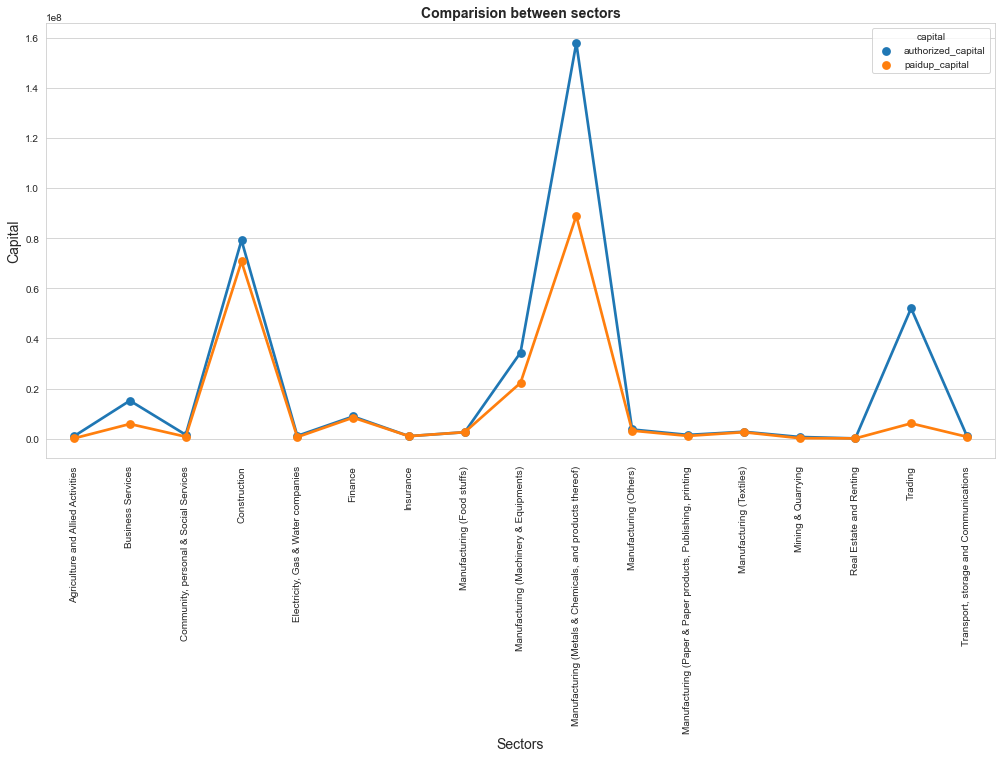

In [36]:
plt.figure(figsize=(17,8))
foreign = fcompanies_activity.melt('activity_description', var_name='capital',  value_name='vals')
sns.pointplot(x="activity_description", y="vals", hue='capital', data=foreign)
plt.xticks(rotation = 90)
plt.title('Comparision between sectors',fontsize=14, weight='bold')
plt.xlabel('Sectors',fontsize=14)
plt.ylabel('Capital',fontsize=14)
plt.show()

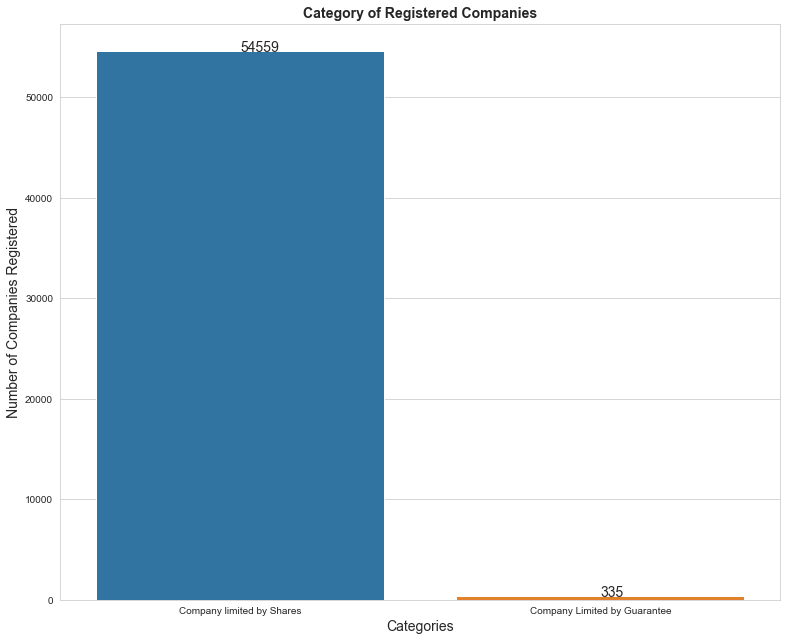

In [37]:
ax=plt.figure(figsize=(10,8)).add_axes([0,0,1,1])
sns.set_style('white')
sns.countplot(x='category',data=companies)

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%i"% rect.get_height()
             ,fontsize=14 )

plt.title('Category of Registered Companies',fontsize=14, weight='bold')
plt.xlabel('Categories',fontsize=14)
plt.ylabel('Number of Companies Registered',fontsize=14)
plt.show()

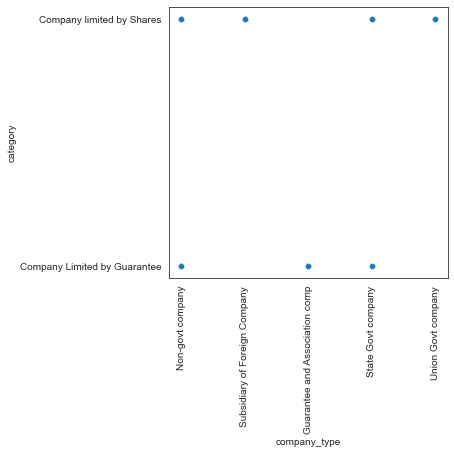

In [38]:
plt.figure(figsize = (5,5))
sns.scatterplot(x='company_type',y='category',data=companies)
plt.xticks(rotation = 90)
plt.show()

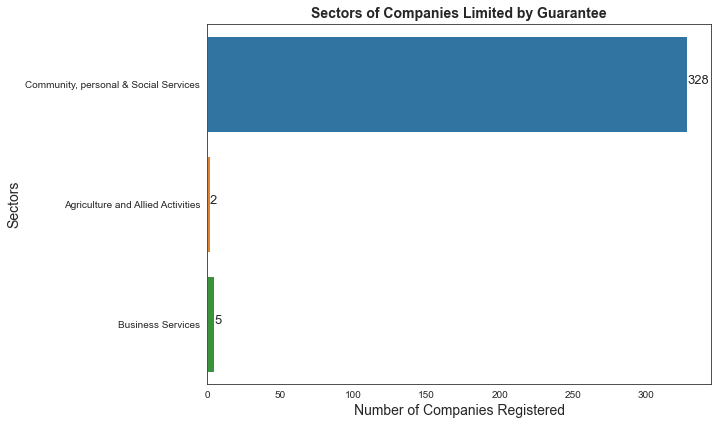

In [39]:
ax=plt.figure(figsize=(7,5)).add_axes([0,0,1,1])
sns.set_style('white')
sns.countplot(y='activity_description',data=companies[companies['category']=='Company Limited by Guarantee'])
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,
             "%i"% rect.get_width(),fontsize=13 )

plt.title('Sectors of Companies Limited by Guarantee',fontsize=14, weight='bold')
plt.xlabel('Number of Companies Registered',fontsize=14)
plt.ylabel('Sectors',fontsize=14)
plt.show()